## Data Preproccessing (Nicole P)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load and skip the metadata row
og_df = pd.read_csv('/content/drive/MyDrive/kaggle_survey_2022_responses.csv')

# Preview structure
print(og_df.columns)

df = og_df.copy()


<ipython-input-73-41acdf46d086>:4: DtypeWarning: Columns (0,15,43,57,73,88,104,118,126,132,170,200,208,215,225,248,255,257,260,270,271,272,277,281,294) have mixed types. Specify dtype option on import or set low_memory=False.
  og_df = pd.read_csv('/content/drive/MyDrive/kaggle_survey_2022_responses.csv')


Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)


Drop Irrelevaent Columns:

Under teh groups evaluation we have created a short list of felevant questions to make our "first cut" with. We used the "List of Questions and Answer Choices" PDF to decide whihc questions could be importnat. This dataset will include questions:

- Q4
- Q8
- Q11
- Q12 (Q12_1 through Q12_15)
- Q16
- Q18 (Q18_1 through Q18_14)
- Q23
- Q24
- Q29

In [ ]:
# Drop all other columns

columns_to_keep = ['Q4', 'Q8', 'Q11', 'Q16', 'Q23', 'Q24', 'Q29']
for i in range(1, 16):
    columns_to_keep.append(f'Q12_{i}')
for i in range(1, 15):
    columns_to_keep.append(f'Q18_{i}')

#Check if all columns exist, otherwise remove non-existent columns
columns_to_keep = [col for col in columns_to_keep if col in df.columns]

df = df[columns_to_keep]
print(df.shape)
df.columns


(23998, 36)


Index(['Q4', 'Q8', 'Q11', 'Q16', 'Q23', 'Q24', 'Q29', 'Q12_1', 'Q12_2',
       'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10',
       'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q18_1', 'Q18_2',
       'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10',
       'Q18_11', 'Q18_12', 'Q18_13', 'Q18_14'],
      dtype='object')

In [ ]:
# Rename Columns

new_column_names = {
    'Q4': 'Country',
    'Q8': 'Education',
    'Q11': 'Coding Experience',
    'Q16': 'ML Experience',
    'Q23': 'Current Role',
    'Q24': 'Industry',
    'Q29': 'Salary',
    'Q12_1': 'Programming Languages_Python',
    'Q12_2': 'Programming Languages_R',
    'Q12_3': 'Programming Languages_SQL',
    'Q12_4': 'Programming Languages_C',
    'Q12_5': 'Programming Languages_C#',
    'Q12_6': 'Programming Languages_C++',
    'Q12_7': 'Programming Languages_Java',
    'Q12_8': 'Programming Languages_Javascript',
    'Q12_9': 'Programming Languages_Bash',
    'Q12_10': 'Programming Languages_PHP',
    'Q12_11': 'Programming Languages_MATLAB',
    'Q12_12': 'Programming Languages_Julia',
    'Q12_13': 'Programming Languages_Go',
    'Q12_14': 'Programming Languages_None',
    'Q12_15': 'Programming Languages_Other',
    'Q18_1': 'ML Algorithms_Linear or Logistic Regression',
    'Q18_2': 'ML Algorithms_Decision Trees or Random Forests',
    'Q18_3': 'ML Algorithms_Gradient Boosting Machines (xgboost, lightgbm, etc)',
    'Q18_4': 'ML Algorithms_Bayesian Approaches',
    'Q18_5': 'ML Algorithms_Evolutionary Approaches',
    'Q18_6': 'ML Algorithms_Dense Neural Networks (MLPs, etc)',
    'Q18_7': 'ML Algorithms_Convolutional Neural Networks',
    'Q18_8': 'ML Algorithms_Generative Adversarial Networks',
    'Q18_9': 'ML Algorithms_Recurrent Neural Networks',
    'Q18_10': 'ML Algorithms_Transformer Networks (BERT, gpt-3, etc)',
    'Q18_11': 'ML Algorithms_Autoencoder Networks (DAE, VAE, etc)',
    'Q18_12': 'ML Algorithms_Graph Neural Networks',
    'Q18_13': 'ML Algorithms_None',
    'Q18_14': 'ML Algorithms_Other'
}

df = df.rename(columns=new_column_names)

print(df.columns)  # Print the new column names to verify

Index(['Country', 'Education', 'Coding Experience', 'ML Experience',
       'Current Role', 'Industry', 'Salary', 'Programming Languages_Python',
       'Programming Languages_R', 'Programming Languages_SQL',
       'Programming Languages_C', 'Programming Languages_C#',
       'Programming Languages_C++', 'Programming Languages_Java',
       'Programming Languages_Javascript', 'Programming Languages_Bash',
       'Programming Languages_PHP', 'Programming Languages_MATLAB',
       'Programming Languages_Julia', 'Programming Languages_Go',
       'Programming Languages_None', 'Programming Languages_Other',
       'ML Algorithms_Linear or Logistic Regression',
       'ML Algorithms_Decision Trees or Random Forests',
       'ML Algorithms_Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'ML Algorithms_Bayesian Approaches',
       'ML Algorithms_Evolutionary Approaches',
       'ML Algorithms_Dense Neural Networks (MLPs, etc)',
       'ML Algorithms_Convolutional Neural Networks

In [ ]:
# View Changes

df.head()

,Country,Education,Coding Experience,ML Experience,Current Role,Industry,Salary,Programming Languages_Python,Programming Languages_R,Programming Languages_SQL,Programming Languages_C,Programming Languages_C#,Programming Languages_C++,Programming Languages_Java,Programming Languages_Javascript,Programming Languages_Bash,Programming Languages_PHP,Programming Languages_MATLAB,Programming Languages_Julia,Programming Languages_Go,Programming Languages_None,Programming Languages_Other,ML Algorithms_Linear or Logistic Regression,ML Algorithms_Decision Trees or Random Forests,"ML Algorithms_Gradient Boosting Machines (xgboost, lightgbm, etc)",ML Algorithms_Bayesian Approaches,ML Algorithms_Evolutionary Approaches,"ML Algorithms_Dense Neural Networks (MLPs, etc)",ML Algorithms_Convolutional Neural Networks,ML Algorithms_Generative Adversarial Networks,ML Algorithms_Recurrent Neural Networks,"ML Algorithms_Transformer Networks (BERT, gpt-3, etc)","ML Algorithms_Autoencoder Networks (DAE, VAE, etc)",ML Algorithms_Graph Neural Networks,ML Algorithms_None,ML Algorithms_Other
0,In which country do you currently reside?,What is the highest level of formal education ...,For how many years have you been writing code ...,For how many years have you used machine learn...,Select the title most similar to your current ...,In what industry is your current employer/cont...,What is your current yearly compensation (appr...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...
1,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Master’s degree,1-3 years,Under 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bayesian Approaches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Egypt,Bachelor’s degree,1-3 years,1-2 years,NaN,NaN,NaN,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,NaN,NaN,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Some college/university study without earning ...,10-20 years,1-2 years,Data Scientist,Online Service/Internet-based Services,"25,000-29,999",Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN


In [ ]:
# Drop row 0
df = df.drop(0)


Next steps:

- Country ; identify top 10 countries, then create 'other' category for all countries following the top ten represented, one hot encode
- Education ; maping/encoding
- Coding experince ; make numerical using midpoint
- ML experince ; make numerical using midpoint
- Current role ; one hot encode and make binary
- Salary ; make numerical using midpoint
- Programming Languages ; make binary
- ML Algorithms ; make binary


In [ ]:
# Loop through each column and print unique values
for col in df.columns:
    print(f"Unique values for {col}:")
    print(df[col].unique())
    print("-" * 20)


Unique values for Country:
['India' 'Algeria' 'Egypt' 'France' 'Germany' 'Australia' 'Other'
 'South Korea' 'United States of America' 'Pakistan' 'Mexico' 'Singapore'
 'Italy' 'Taiwan' 'China' 'Argentina' 'Turkey' 'Brazil' 'Nigeria' 'Chile'
 'Japan' 'Canada' 'Indonesia' 'Israel' 'Colombia' 'Russia'
 'United Kingdom of Great Britain and Northern Ireland' 'Ethiopia'
 'South Africa' 'Viet Nam' 'Kenya' 'Spain' 'Iran, Islamic Republic of...'
 'Cameroon' 'Tunisia' 'Peru' 'Nepal' 'Morocco' 'Philippines' 'Ecuador'
 'Thailand' 'United Arab Emirates' 'Bangladesh' 'Netherlands' 'Zimbabwe'
 'Ghana' 'Portugal' 'Poland' 'Saudi Arabia' 'Romania' 'Czech Republic'
 'Malaysia' 'Sri Lanka' 'Hong Kong (S.A.R.)' 'Ukraine'
 'I do not wish to disclose my location' 'Belgium' 'Ireland']
--------------------
Unique values for Education:
[nan 'Master’s degree' 'Bachelor’s degree'
 'Some college/university study without earning a bachelor’s degree'
 'Doctoral degree' 'I prefer not to answer' 'Professional doctora

In [ ]:
# Identify top countries represented by survey data and change all else to "Other"

# Identify top countries and create 'Other' category
top_countries = df['Country'].value_counts().nlargest(10).index
df['Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')

# Display the distribution of countries
country_distribution = df['Country'].value_counts(normalize=True) * 100
country_distribution

,proportion
Country,
India,36.637913
Other,34.708505
United States of America,12.168188
Brazil,3.471267
Nigeria,3.046214
Pakistan,2.583656
Japan,2.316956
China,1.887736
Egypt,1.596033


In [ ]:
import pandas as pd
import numpy as np

def convert_experience_to_numerical(df, col_name, new_col_name):
    """Converts coding/ML experience from range categories to numerical (years)."""

    if col_name == 'Coding Experience':
        mapping = {
            'For how many years have you been writing code and/or programming?': np.nan,
            'I have never written code': 0,
            '< 1 years': 0.5,
            '1-3 years': 2,
            '3-5 years': 4,
            '5-10 years': 7.5,
            '10-20 years': 15,
            '20+ years': 25
        }
    elif col_name == 'ML Experience':
        mapping = {
            'For how many years have you used machine learning methods?': np.nan,
            'I do not use machine learning methods': 0,
            'Under 1 year': 0.5,
            '1-2 years': 1.5,
            '2-3 years': 2.5,
            '3-4 years': 3.5,
            '4-5 years': 4.5,
            '5-10 years': 7.5,
            '10-20 years': 15,
            '20 or more years': 25
        }
    else:
        raise ValueError(f"Unknown column name: {col_name}")

    df[new_col_name] = df[col_name].map(mapping)

    # Handle potential NaN values (unmapped values)
    if df[new_col_name].isnull().any():
        print(f"Warning: Some values in '{col_name}' were not mapped. Imputing with 0.")
        df[new_col_name] = df[new_col_name].fillna(0)  # Or another strategy

    return df

def convert_salary_to_numerical(df, col_name, new_col_name):
    """Converts salary ranges to numerical (midpoint)."""

    mapping = {
        'What is your current yearly compensation (approximate $USD)?': np.nan,
        '0-9,999': 5000,
        '10,000-14,999': 12500,
        '15,000-19,999': 17500,
        '20,000-24,999': 22500,
        '25,000-29,999': 27500,
        '30,000-39,999': 35000,
        '40,000-49,999': 45000,
        '50,000-59,999': 55000,
        '60,000-69,999': 65000,
        '70,000-79,999': 75000,
        '80,000-89,999': 85000,
        '90,000-99,999': 95000,
        '100,000-124,999': 112500,
        '125,000-149,999': 137500,
        '150,000-199,999': 175000,
        '200,000-249,999': 225000,
        '250,000-299,999': 275000,
        '300,000-499,999': 400000,
        '500,000+': 600000  # Or another high value
    }

    df[new_col_name] = df[col_name].map(mapping)

    # Handle potential NaN values (unmapped values)
    if df[new_col_name].isnull().any():
        print(f"Warning: Some values in '{col_name}' were not mapped. Imputing with NaN.")
        # df[new_col_name] = df[new_col_name].fillna(0)  # Or another strategy
    return df

# Apply the conversions
df = convert_experience_to_numerical(df, 'Coding Experience', 'Coding_Experience_Numerical')
df = convert_experience_to_numerical(df, 'ML Experience', 'ML_Experience_Numerical')
df = convert_salary_to_numerical(df, 'Salary', 'Salary_Numerical')

# Print the results
print(df[['Coding Experience', 'Coding_Experience_Numerical', 'ML Experience', 'ML_Experience_Numerical', 'Salary', 'Salary_Numerical']].head())
print(df[['Coding Experience', 'Coding_Experience_Numerical', 'ML Experience', 'ML_Experience_Numerical', 'Salary', 'Salary_Numerical']].dtypes)

  Coding Experience  Coding_Experience_Numerical  \
1               NaN                          0.0   
2         1-3 years                          2.0   
3         1-3 years                          2.0   
4       10-20 years                         15.0   
5        5-10 years                          7.5   

                           ML Experience  ML_Experience_Numerical  \
1                                    NaN                      0.0   
2                           Under 1 year                      0.5   
3                              1-2 years                      1.5   
4                              1-2 years                      1.5   
5  I do not use machine learning methods                      0.0   

          Salary  Salary_Numerical  
1            NaN               NaN  
2            NaN               NaN  
3            NaN               NaN  
4  25,000-29,999           27500.0  
5            NaN               NaN  
Coding Experience               object
Coding_Expe

In [ ]:
df.head(5)

,Country,Education,Coding Experience,ML Experience,Current Role,Industry,Salary,Programming Languages_Python,Programming Languages_R,Programming Languages_SQL,...,ML Algorithms_Generative Adversarial Networks,ML Algorithms_Recurrent Neural Networks,"ML Algorithms_Transformer Networks (BERT, gpt-3, etc)","ML Algorithms_Autoencoder Networks (DAE, VAE, etc)",ML Algorithms_Graph Neural Networks,ML Algorithms_None,ML Algorithms_Other,Coding_Experience_Numerical,ML_Experience_Numerical,Salary_Numerical
1,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,Other,Master’s degree,1-3 years,Under 1 year,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.5,NaN
3,Egypt,Bachelor’s degree,1-3 years,1-2 years,NaN,NaN,NaN,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.5,NaN
4,Other,Some college/university study without earning ...,10-20 years,1-2 years,Data Scientist,Online Service/Internet-based Services,"25,000-29,999",Python,NaN,SQL,...,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN,15.0,1.5,27500.0
5,India,Bachelor’s degree,5-10 years,I do not use machine learning methods,NaN,NaN,NaN,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,0.0,NaN


In [ ]:
# Ensure correct case and values in the mapping
education_mapping = {
    'No formal education past high school': 'HS',
    'Some college/university study without earning a bachelor’s degree': 'Some College',
    'Bachelor’s degree': 'BS',
    'Master’s degree': 'MS',
    'Doctoral degree': 'PhD',
    'Professional doctorate': 'PhD',
    'I prefer not to answer': 'NA'
}

# Apply mapping
df['Education'] = df['Education'].map(education_mapping)

# Replace any remaining NaNs with a suitable value (e.g., 'Unknown')
df['Education'] = df['Education'].fillna('Unknown')

# Ordinal encoding
education_order = ['HS', 'Some College', 'BS', 'MS', 'PhD', 'NA', 'Unknown']
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[education_order], handle_unknown='use_encoded_value', unknown_value=-1)
df['Education_Encoded'] = encoder.fit_transform(df[['Education']])

In [ ]:
# prompt: dropindustryand current role

# Drop 'Industry' and 'Current Role' columns
df = df.drop(['Industry', 'Current Role'], axis=1)


In [ ]:
df.head()

,Country,Education,Coding Experience,ML Experience,Salary,Programming Languages_Python,Programming Languages_R,Programming Languages_SQL,Programming Languages_C,Programming Languages_C#,...,ML Algorithms_Recurrent Neural Networks,"ML Algorithms_Transformer Networks (BERT, gpt-3, etc)","ML Algorithms_Autoencoder Networks (DAE, VAE, etc)",ML Algorithms_Graph Neural Networks,ML Algorithms_None,ML Algorithms_Other,Coding_Experience_Numerical,ML_Experience_Numerical,Salary_Numerical,Education_Encoded
1,India,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,6.0
2,Other,MS,1-3 years,Under 1 year,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.5,NaN,3.0
3,Egypt,BS,1-3 years,1-2 years,NaN,Python,NaN,SQL,C,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.5,NaN,2.0
4,Other,Some College,10-20 years,1-2 years,"25,000-29,999",Python,NaN,SQL,NaN,NaN,...,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN,15.0,1.5,27500.0,1.0
5,India,BS,5-10 years,I do not use machine learning methods,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,0.0,NaN,2.0


In [ ]:
# prompt: mean imputation for Salary_Numerical

# Calculate the mean of 'Salary_Numerical', excluding NaN values
mean_salary = df['Salary_Numerical'].mean(skipna=True)

# Fill NaN values in 'Salary_Numerical' with the calculated mean
df['Salary_Numerical'] = df['Salary_Numerical'].fillna(mean_salary)


In [ ]:
# Drop specified columns because their numerical versions will be used
df = df.drop(columns=['Coding Experience', 'ML Experience', 'Salary'])

In [ ]:
df.head()

,Country,Education,Programming Languages_Python,Programming Languages_R,Programming Languages_SQL,Programming Languages_C,Programming Languages_C#,Programming Languages_C++,Programming Languages_Java,Programming Languages_Javascript,...,ML Algorithms_Recurrent Neural Networks,"ML Algorithms_Transformer Networks (BERT, gpt-3, etc)","ML Algorithms_Autoencoder Networks (DAE, VAE, etc)",ML Algorithms_Graph Neural Networks,ML Algorithms_None,ML Algorithms_Other,Coding_Experience_Numerical,ML_Experience_Numerical,Salary_Numerical,Education_Encoded
1,India,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,78061.2143,6.0
2,Other,MS,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.5,78061.2143,3.0
3,Egypt,BS,Python,NaN,SQL,C,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.5,78061.2143,2.0
4,Other,Some College,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,...,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN,15.0,1.5,27500.0000,1.0
5,India,BS,Python,NaN,NaN,NaN,NaN,C++,Java,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,0.0,78061.2143,2.0


In [ ]:
# prompt: get distributions of salary grouped by education order by na, hs, some college, bs, ms, phd unknown order the edcuation types

# Assuming df is your DataFrame from the previous code

education_order = ['NA', 'HS', 'Some College', 'BS', 'MS', 'PhD', 'Unknown']
salary_distributions = df.groupby('Education')['Salary_Numerical'].describe()
salary_distributions = salary_distributions.loc[education_order]
salary_distributions


,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
NA,1394.0,74617.594192,1.974267e+04,12500.0000,78061.2143,78061.2143,78061.2143,400000.0000
HS,564.0,75556.150467,3.549976e+04,12500.0000,78061.2143,78061.2143,78061.2143,400000.0000
Some College,1431.0,77184.634384,2.449793e+04,12500.0000,78061.2143,78061.2143,78061.2143,400000.0000
BS,7625.0,76965.471356,2.589921e+04,12500.0000,78061.2143,78061.2143,78061.2143,400000.0000
MS,9142.0,78243.047570,3.538864e+04,12500.0000,78061.2143,78061.2143,78061.2143,400000.0000
PhD,3242.0,82429.002235,4.557153e+04,12500.0000,78061.2143,78061.2143,78061.2143,400000.0000
Unknown,599.0,78061.214300,6.699476e-10,78061.2143,78061.2143,78061.2143,78061.2143,78061.2143


In [ ]:
# Convert 12_ and 18_ columns to binary (using 1 and 0)
for col in df.columns:
    if col.startswith('Programming Languages_'):
        df[col] = df[col].apply(lambda x: 1 if pd.notna(x) else 0)
    elif col.startswith('ML Algorithms_'):
        df[col] = df[col].apply(lambda x: 1 if pd.notna(x) else 0)

In [ ]:
# One-hot encode categorical features
categorical_cols = ['Country', 'Education']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df.head()

,Programming Languages_Python,Programming Languages_R,Programming Languages_SQL,Programming Languages_C,Programming Languages_C#,Programming Languages_C++,Programming Languages_Java,Programming Languages_Javascript,Programming Languages_Bash,Programming Languages_PHP,...,Country_Nigeria,Country_Other,Country_Pakistan,Country_United States of America,Education_HS,Education_MS,Education_NA,Education_PhD,Education_Some College,Education_Unknown
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,0,0,0,0,0,0,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
3,1,0,1,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,0,1,0,0,0,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False
5,1,0,0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Cant figure out why my encoded varibales are T/F and not Binary, so here is hard coding to fix

import pandas as pd

def convert_bool_to_int(df):
    """
    Converts all boolean (True/False) values in a DataFrame to integers (1/0).

    Args:
        df: The DataFrame to modify.

    Returns:
        The modified DataFrame.
    """
    for col in df.columns:
        if df[col].dtype == bool:
            df[col] = df[col].astype(int)
    return df

df = convert_bool_to_int(df)

In [ ]:
# view df with all columns

pd.set_option("display.max_columns", None)
df


,Programming Languages_Python,Programming Languages_R,Programming Languages_SQL,Programming Languages_C,Programming Languages_C#,Programming Languages_C++,Programming Languages_Java,Programming Languages_Javascript,Programming Languages_Bash,Programming Languages_PHP,Programming Languages_MATLAB,Programming Languages_Julia,Programming Languages_Go,Programming Languages_None,Programming Languages_Other,ML Algorithms_Linear or Logistic Regression,ML Algorithms_Decision Trees or Random Forests,"ML Algorithms_Gradient Boosting Machines (xgboost, lightgbm, etc)",ML Algorithms_Bayesian Approaches,ML Algorithms_Evolutionary Approaches,"ML Algorithms_Dense Neural Networks (MLPs, etc)",ML Algorithms_Convolutional Neural Networks,ML Algorithms_Generative Adversarial Networks,ML Algorithms_Recurrent Neural Networks,"ML Algorithms_Transformer Networks (BERT, gpt-3, etc)","ML Algorithms_Autoencoder Networks (DAE, VAE, etc)",ML Algorithms_Graph Neural Networks,ML Algorithms_None,ML Algorithms_Other,Coding_Experience_Numerical,ML_Experience_Numerical,Salary_Numerical,Education_Encoded,Country_China,Country_Egypt,Country_India,Country_Japan,Country_Mexico,Country_Nigeria,Country_Other,Country_Pakistan,Country_United States of America,Education_HS,Education_MS,Education_NA,Education_PhD,Education_Some College,Education_Unknown
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,78061.2143,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,0.5,78061.2143,3.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2.0,1.5,78061.2143,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15.0,1.5,27500.0000,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.5,0.0,78061.2143,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,4.0,1.5,78061.2143,3.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
23994,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,25.0,2.5,78061.2143,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
23995,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5,27500.0000,3.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
23996,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.0,0.5,17500.0000,4.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


**Numerical Features:**
* Coding_Experience_Numerical: Represents years of coding experience, converted from categorical ranges to numerical values.
* ML_Experience_Numerical: Represents years of machine learning experience, converted from categorical ranges to numerical values.
* Salary_Numerical: Represents yearly compensation in USD, converted from salary ranges to numerical midpoints.

**Categorical Features (One-Hot Encoded):**
* Country: Top 10 most frequent countries are represented as individual columns (e.g., 'Country_India', 'Country_United States'). All other countries are grouped into a single 'Country_Other' column.
* Education: Encoded into ordinal values (0: HS, 1: Some College, 2: BS, 3: MS, 4: PhD) and then one-hot encoded with 'Education_1', 'Education_2', 'Education_3', 'Education_4' columns
* Current Role: Each unique job role is represented as a separate column (e.g., 'Current Role_Student', 'Current Role_Data Scientist').
* Industry: Each unique industry is represented as a separate column (e.g., 'Industry_Computers/Technology', 'Industry_Academics/Education').

**Binary Features:**
* Programming Languages_...: Each programming language has a column indicating whether the respondent uses it (1 for 'Yes', 0 for other responses).
* ML Algorithms_...: Each machine learning algorithm has a column indicating whether the respondent uses it (1 for 'Yes', 0 for other responses).

In [ ]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 1 to 23997
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Programming Languages_Python                                       23997 non-null  int64  
 1   Programming Languages_R                                            23997 non-null  int64  
 2   Programming Languages_SQL                                          23997 non-null  int64  
 3   Programming Languages_C                                            23997 non-null  int64  
 4   Programming Languages_C#                                           23997 non-null  int64  
 5   Programming Languages_C++                                          23997 non-null  int64  
 6   Programming Languages_Java                                         23997 non-null  int64  
 7   Programming Languages_

In [ ]:
# Split into train and test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Salary_Numerical'])
y = df['Salary_Numerical']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# prompt: export df as csv

# Export the DataFrame 'df' to a CSV file named 'preprocessed_kaggle_survey.csv'
df.to_csv('preprocessed_kaggle_survey.csv', index=False)

# Download the CSV file to your local machine
from google.colab import files
files.download('preprocessed_kaggle_survey.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Three Models

Lasso Linear Rgression Model

In [ ]:
# fitting the model

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [ ]:
# evaluating the model

from sklearn.metrics import mean_squared_error, r2_score

y_pred_lasso = lasso_model.predict(X_test)


#MSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error: {mse_lasso}")

#RMSE
rmse_lasso = np.sqrt(mse_lasso)
print(f"Root Mean Squared Error: {rmse_lasso}")

#R^2
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R-squared: {r2_lasso}")


# COMMENT!!
#after running Dylans part with the synthetic data, my r^2 jumped up to almost 50%. However, just running on my test data set before is what generated the low r^2.
# i think the lower r^2 is okay. i thinkt he synthetic data in dylans model is skewing his results

Mean Squared Error: 924723845.6525257
Root Mean Squared Error: 30409.272363088956
R-squared: 0.13292770116971164


not sure how to evaluate this model because he said the r^2 would be low..

Random Forest (Regressor)

In [ ]:
# model 3: random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score


rf = RandomForestRegressor(
     n_estimators=100,
    max_depth=7,
    max_features=5,
    bootstrap=True,
    oob_score=True,
    max_samples=0.7,  # use 70% of samples or each tree
    random_state=42
)

# fit the model to the training data
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)

# evaluate the model's performance using regression metrics
mse_rf= mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Print the Out-of-Bag score
oob_score = rf.oob_score_
print(f"Out-of-Bag Score: {oob_score:.4f}")

Mean Squared Error: 879375420.4405054
R-squared: 0.17544889653174278
Out-of-Bag Score: 0.1659


eXtreme Gradient Boosting model

In [ ]:
# fitting model
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        n_estimators=200,
                        learning_rate=0.03,
                        max_depth=5,
                        min_child_weight=1,
                        gamma=0,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        reg_alpha=0.1, #using same alpha as lasso
                        random_state=42,
                        n_jobs=-1)

xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

# evaluate the model

#MSE
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
print(f"Mean Squared Error: {mse_xgbr}")

#RMSE
rmse_xgbr = np.sqrt(mse_xgbr)
print(f"Root Mean Squared Error: {rmse_xgbr}")

#R^2
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print(f"R-squared: {r2_xgbr}")

Mean Squared Error: 847807798.7156332
Root Mean Squared Error: 29117.139260504853
R-squared: 0.20504844721519633


## Choosing a Model...

Choosing a model for this dataset is a bit difficult because the dataset has a lot of noise. There are a lot of variables in the dataset,and many of them did not directly have an impact on the target variable. The weak signal betweent the dependent variable (salary_numerical) and independent variables, cause the r2 to be lower. Additionally, having a numerical target has made model evaluation different than with categorical variables. We cannot generate a classification report without binning the salary variables. This means accuracy would need to be evaluated through **mean squared error**, **root mean error**, and the **r2**.


The model we decided to choose was the **Gradient Boosting model**. This model overall had the highest r2 and lowest mean square error.


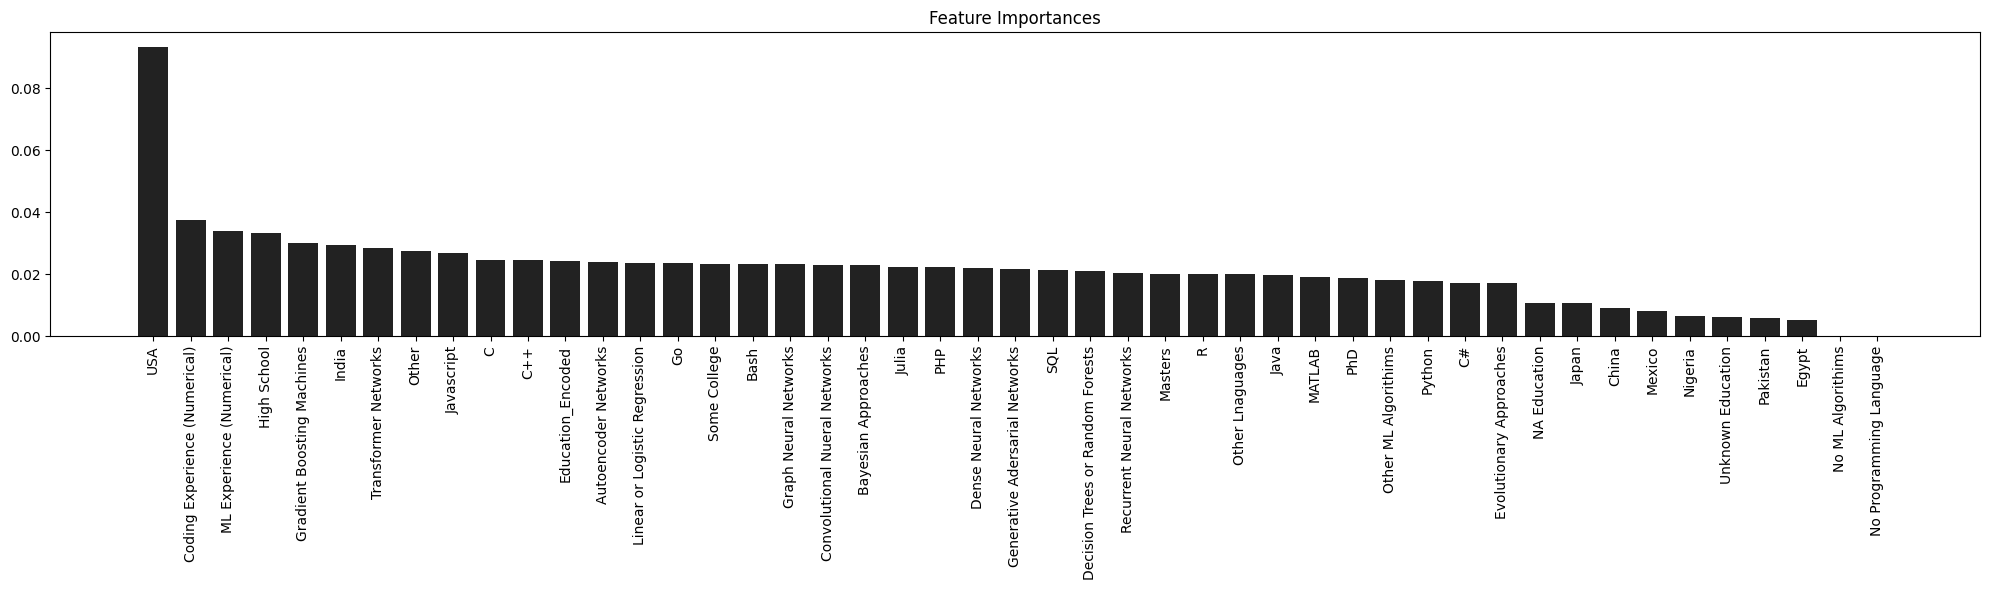

In [ ]:
# show important features of chosen model (gradient boosting)

from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = xgbr.feature_importances_

# Get feature names (if available)
feature_names = ['Python', 'R', 'SQL', 'C', 'C#', 'C++', 'Java', 'Javascript', 'Bash', 'PHP', 'MATLAB', 'Julia', 'Go', 'No Programming Language', 'Other Lnaguages',
                 'Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines', 'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks',
                 'Convolutional Nueral Networks', 'Generative Adersarial Networks', 'Recurrent Neural Networks', 'Transformer Networks', 'Autoencoder Networks', 'Graph Neural Networks', 'No ML Algorithims', 'Other ML Algorithims',
                 'Coding Experience (Numerical)', 'ML Experience (Numerical)', 'Education_Encoded', 'China','Egypt','India','Japan','Mexico','Nigeria','Other','Pakistan','USA',
                 'High School', 'Masters','NA Education', 'PhD', 'Some College', 'Unknown Education']

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(20,6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices],
        tick_label=np.array(feature_names)[sorted_indices], color= '#222222')
plt.xticks(rotation=90, ha='center')  # ha='center' or 'right' depending on your preference

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


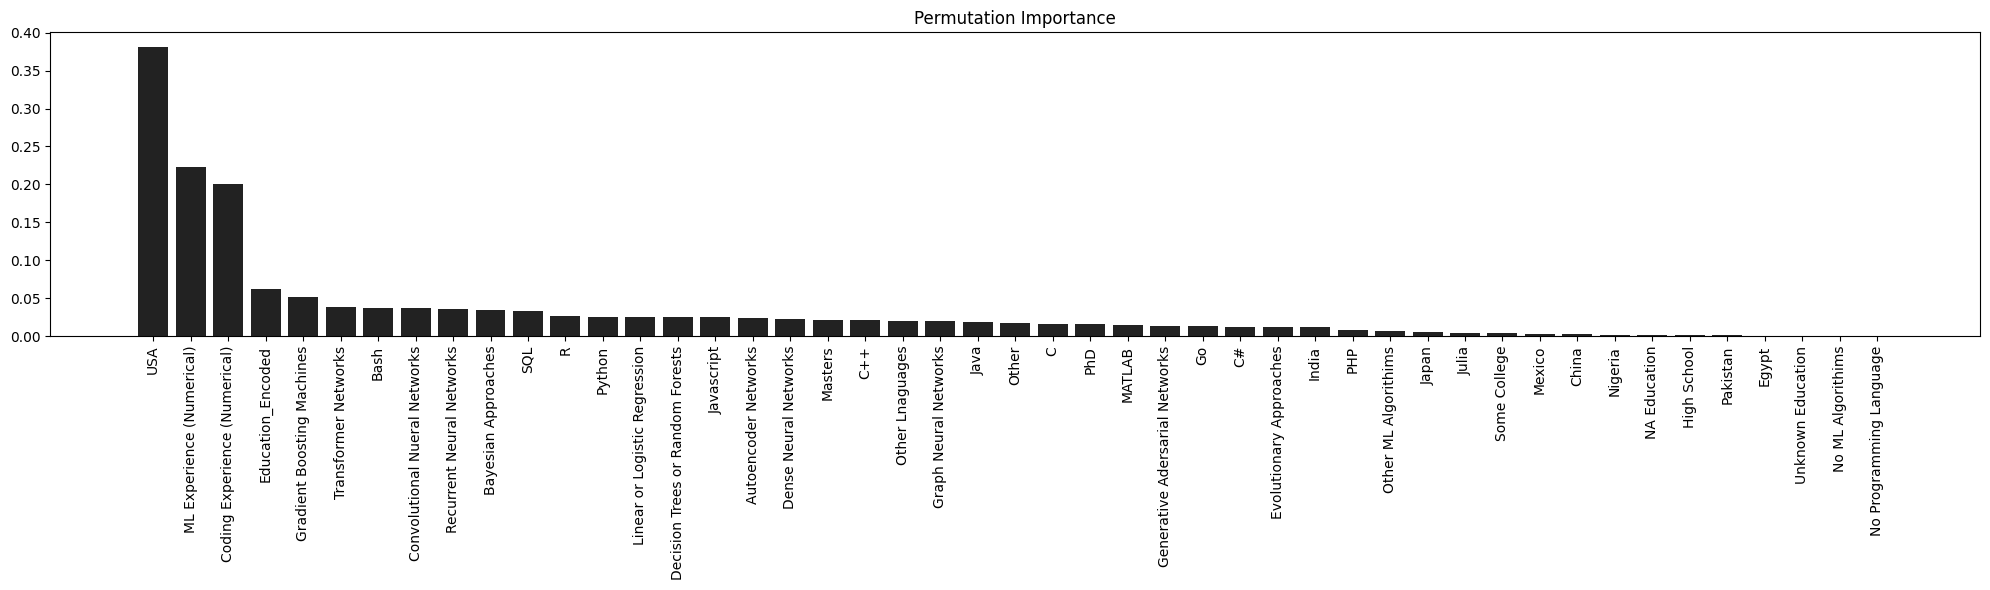

In [ ]:
#showing permuatation importance for our chosen model (Gradient Boosting)
  #I did some background researching and found that this is a better fit for the gradient boosting models vs feature importances. additionally, we cannot display p-values for a gradient boosting model?
from sklearn.inspection import permutation_importance

# calculate permutation importance
result = permutation_importance(xgbr, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Extract importance means and standard deviations
importance_means = result.importances_mean
importance_stds = result.importances_std

# sort features
sorted_idx = importance_means.argsort()[::-1]

# plot
plt.figure(figsize=(20,6))
plt.bar(range(len(importance_means)), importance_means[sorted_idx],
        tick_label=np.array(feature_names)[sorted_idx], color= '#222222')
plt.xticks(rotation=90)
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

## Gradio

In [ ]:
#create a picle file for the xgbr

import pickle

with open('xgbr.pkl', 'wb') as file:
    pickle.dump(xgbr, file)

# Download the pickle file
from google.colab import files
files.download('xgbr.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install Gradio
!pip install gradio

# Import libraries
import pickle
import pandas as pd
import gradio as gr

# Load trained model
with open('/content/xgbr.pkl', 'rb') as file:
    model = pickle.load(file)

# Define expected feature list (all 48 features from training)
expected_features = [
    'Coding_Experience_Numerical', 'ML_Experience_Numerical', 'Education_Encoded',
    'Country_China', 'Country_Egypt', 'Country_India', 'Country_Japan', 'Country_Mexico',
    'Country_Nigeria', 'Country_Other', 'Country_Pakistan', 'Country_United States of America',
    'Programming Languages_Python', 'Programming Languages_R', 'Programming Languages_SQL',
    'Programming Languages_C', 'Programming Languages_C#', 'Programming Languages_C++',
    'Programming Languages_Java', 'Programming Languages_Javascript', 'Programming Languages_Bash',
    'Programming Languages_PHP', 'Programming Languages_MATLAB', 'Programming Languages_Julia',
    'Programming Languages_Go', 'Programming Languages_None', 'Programming Languages_Other',
    'ML Algorithms_Linear or Logistic Regression', 'ML Algorithms_Decision Trees or Random Forests',
    'ML Algorithms_Gradient Boosting Machines (xgboost, lightgbm, etc)', 'ML Algorithms_Bayesian Approaches',
    'ML Algorithms_Evolutionary Approaches', 'ML Algorithms_Dense Neural Networks (MLPs, etc)',
    'ML Algorithms_Convolutional Neural Networks', 'ML Algorithms_Generative Adversarial Networks',
    'ML Algorithms_Recurrent Neural Networks', 'ML Algorithms_Transformer Networks (BERT, gpt-3, etc)',
    'ML Algorithms_Autoencoder Networks (DAE, VAE, etc)', 'ML Algorithms_Graph Neural Networks',
    'ML Algorithms_None', 'ML Algorithms_Other',
    'Education_HS', 'Education_MS', 'Education_NA', 'Education_PhD', 'Education_Some College', 'Education_Unknown'
]

# Define prediction function
def predict_salary(
    education, coding_years, ml_years, country,
    python, r, sql, c, c_sharp, cpp, java, javascript, bash, php, matlab, julia, go, none_prog, other_prog,
    logistic_reg, random_forest, xgboost, bayesian, evolutionary, dense_nn, cnn, gan, rnn, transformer, autoencoder, graph_nn, none_algo, other_algo
):
    education_mapping = {'HS': 0, 'BS': 1, 'MS': 2, 'PhD': 3}
    education_num = education_mapping.get(education, 0)

    # Initialize all features to 0
    features = {feature: 0 for feature in expected_features}

    # Fill basic fields
    features['Education_Encoded'] = education_num
    features['Coding_Experience_Numerical'] = coding_years
    features['ML_Experience_Numerical'] = ml_years

    # Set country
    if f"Country_{country}" in features:
        features[f"Country_{country}"] = 1
    else:
        features['Country_Other'] = 1

    # Set programming languages
    prog_lang_inputs = [
        (python, 'Programming Languages_Python'), (r, 'Programming Languages_R'),
        (sql, 'Programming Languages_SQL'), (c, 'Programming Languages_C'),
        (c_sharp, 'Programming Languages_C#'), (cpp, 'Programming Languages_C++'),
        (java, 'Programming Languages_Java'), (javascript, 'Programming Languages_Javascript'),
        (bash, 'Programming Languages_Bash'), (php, 'Programming Languages_PHP'),
        (matlab, 'Programming Languages_MATLAB'), (julia, 'Programming Languages_Julia'),
        (go, 'Programming Languages_Go'), (none_prog, 'Programming Languages_None'),
        (other_prog, 'Programming Languages_Other')
    ]
    for value, name in prog_lang_inputs:
        features[name] = int(value)

    # Set ML algorithms
    ml_algo_inputs = [
        (logistic_reg, 'ML Algorithms_Linear or Logistic Regression'),
        (random_forest, 'ML Algorithms_Decision Trees or Random Forests'),
        (xgboost, 'ML Algorithms_Gradient Boosting Machines (xgboost, lightgbm, etc)'),
        (bayesian, 'ML Algorithms_Bayesian Approaches'),
        (evolutionary, 'ML Algorithms_Evolutionary Approaches'),
        (dense_nn, 'ML Algorithms_Dense Neural Networks (MLPs, etc)'),
        (cnn, 'ML Algorithms_Convolutional Neural Networks'),
        (gan, 'ML Algorithms_Generative Adversarial Networks'),
        (rnn, 'ML Algorithms_Recurrent Neural Networks'),
        (transformer, 'ML Algorithms_Transformer Networks (BERT, gpt-3, etc)'),
        (autoencoder, 'ML Algorithms_Autoencoder Networks (DAE, VAE, etc)'),
        (graph_nn, 'ML Algorithms_Graph Neural Networks'),
        (none_algo, 'ML Algorithms_None'),
        (other_algo, 'ML Algorithms_Other')
    ]
    for value, name in ml_algo_inputs:
        features[name] = int(value)

    # Handle dummy Education columns
    if education == "HS":
        features["Education_HS"] = 1
    elif education == "MS":
        features["Education_MS"] = 1
    elif education == "PhD":
        features["Education_PhD"] = 1
    elif education == "BS":
        features["Education_Some College"] = 1
    else:
        features["Education_Unknown"] = 1

    # Build input DataFrame
    input_df = pd.DataFrame([features])

    # 🔥 Reorder columns to match model
    input_df = input_df[model.get_booster().feature_names]

    # Predict
    predicted_salary = model.predict(input_df)[0]

    return f"💰 Estimated Salary: ${predicted_salary:,.2f}"

# Build Gradio Interface
interface = gr.Interface(
    fn=predict_salary,
    inputs=[
        gr.Dropdown(["HS", "BS", "MS", "PhD"], label="Education Level"),
        gr.Slider(0, 40, step=1, label="Years of Coding Experience"),
        gr.Slider(0, 40, step=1, label="Years of Machine Learning Experience"),
        gr.Dropdown(["China", "Egypt", "India", "Japan", "Mexico", "Nigeria", "Pakistan", "United States of America", "Other"], label="Country"),

        # Programming Languages
        gr.Checkbox(label="Knows Python"), gr.Checkbox(label="Knows R"), gr.Checkbox(label="Knows SQL"),
        gr.Checkbox(label="Knows C"), gr.Checkbox(label="Knows C#"), gr.Checkbox(label="Knows C++"),
        gr.Checkbox(label="Knows Java"), gr.Checkbox(label="Knows Javascript"), gr.Checkbox(label="Knows Bash"),
        gr.Checkbox(label="Knows PHP"), gr.Checkbox(label="Knows MATLAB"), gr.Checkbox(label="Knows Julia"),
        gr.Checkbox(label="Knows Go"), gr.Checkbox(label="None (No Languages)"), gr.Checkbox(label="Other Language"),

        # ML Algorithms
        gr.Checkbox(label="Uses Logistic Regression"),
        gr.Checkbox(label="Uses Random Forest"),
        gr.Checkbox(label="Uses Gradient Boosting (XGBoost, LightGBM)"),
        gr.Checkbox(label="Uses Bayesian Methods"),
        gr.Checkbox(label="Uses Evolutionary Methods"),
        gr.Checkbox(label="Uses Dense Neural Networks (MLP)"),
        gr.Checkbox(label="Uses CNNs"),
        gr.Checkbox(label="Uses GANs"),
        gr.Checkbox(label="Uses RNNs"),
        gr.Checkbox(label="Uses Transformers (BERT, GPT)"),
        gr.Checkbox(label="Uses Autoencoders"),
        gr.Checkbox(label="Uses Graph Neural Networks"),
        gr.Checkbox(label="None (No ML Methods)"),
        gr.Checkbox(label="Other ML Methods")
    ],
    outputs=gr.Textbox(label="Predicted Salary"),
    title="💼 Data Scientist Salary Predictor",
    description="📈 Predict your salary based on education, coding experience, programming languages, machine learning techniques, and country."
)

# Launch the App
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://485c64489ad86e4e69.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<ipython-input-53-0ad5315411a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education_Label', y='Salary_Numerical', data=df, palette='Set2')


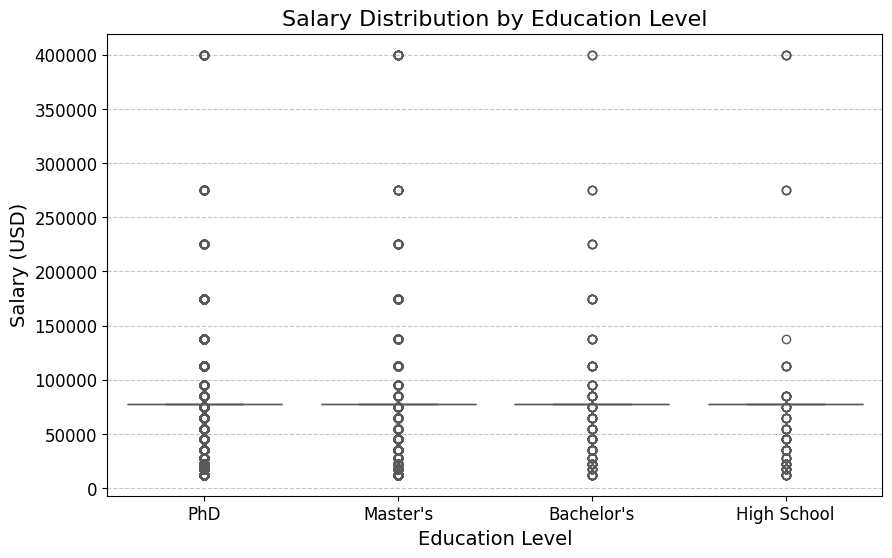

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you already have your dataframe loaded and cleaned as 'df'
# Example: df = pd.read_csv('your_cleaned_data.csv')

# Map the education codes back to labels (if needed)
education_mapping = {0: 'High School', 1: 'Bachelor\'s', 2: 'Master\'s', 3: 'PhD'}
df['Education_Label'] = df['Education_Encoded'].map(education_mapping)

# Create the Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Education_Label', y='Salary_Numerical', data=df, palette='Set2')

# Customize
plt.title('Salary Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


<ipython-input-54-9de39a8f9845>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education_Label', y='Salary_Numerical', data=df, palette='Set2')


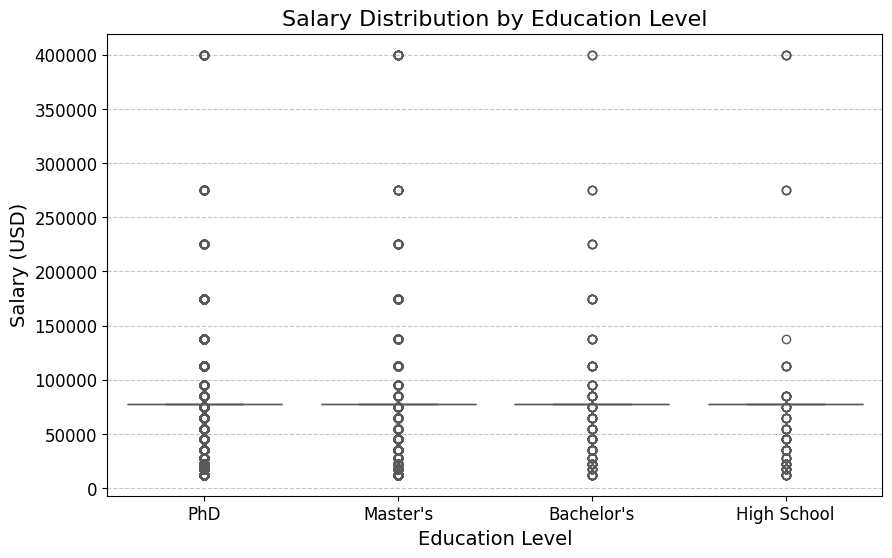

<ipython-input-54-9de39a8f9845>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Coding_Experience_Bin', y='Salary_Numerical', data=df, palette='Set3')


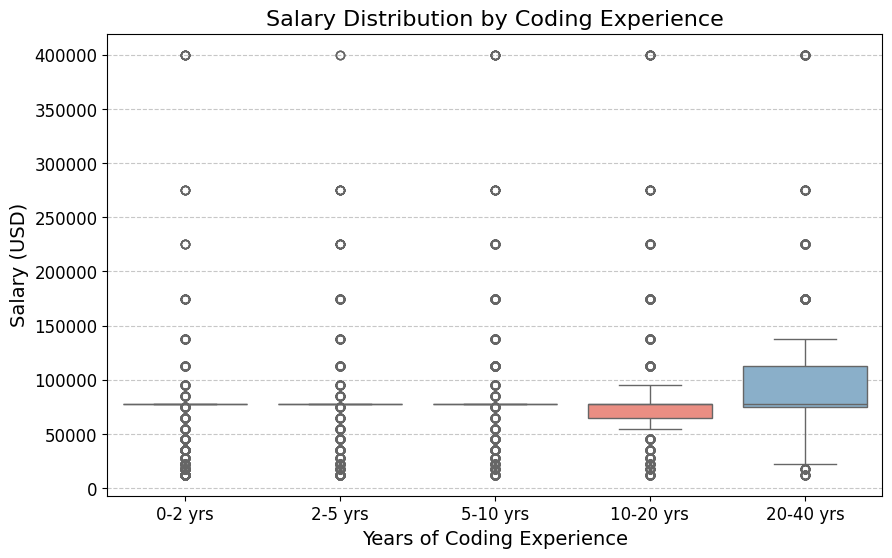

<ipython-input-54-9de39a8f9845>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ML_Experience_Bin', y='Salary_Numerical', data=df, palette='Set1')


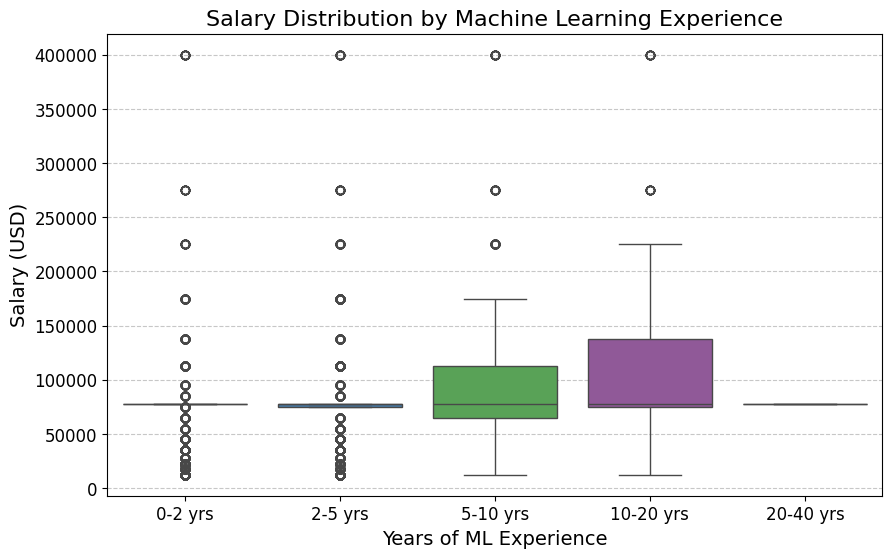

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you already have your dataframe loaded and cleaned as 'df'

# 1. Boxplot: Salary by Education Level
education_mapping = {0: 'High School', 1: 'Bachelor\'s', 2: 'Master\'s', 3: 'PhD'}
df['Education_Label'] = df['Education_Encoded'].map(education_mapping)

plt.figure(figsize=(10,6))
sns.boxplot(x='Education_Label', y='Salary_Numerical', data=df, palette='Set2')
plt.title('Salary Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# --------------------------------------------------------

# 2. Boxplot: Salary by Coding Experience (grouped into bins)

# Create bins for Coding Experience
coding_bins = [0, 2, 5, 10, 20, 40]
coding_labels = ['0-2 yrs', '2-5 yrs', '5-10 yrs', '10-20 yrs', '20-40 yrs']
df['Coding_Experience_Bin'] = pd.cut(df['Coding_Experience_Numerical'], bins=coding_bins, labels=coding_labels)

plt.figure(figsize=(10,6))
sns.boxplot(x='Coding_Experience_Bin', y='Salary_Numerical', data=df, palette='Set3')
plt.title('Salary Distribution by Coding Experience', fontsize=16)
plt.xlabel('Years of Coding Experience', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# --------------------------------------------------------

# 3. Boxplot: Salary by ML Experience (grouped into bins)

# Create bins for ML Experience
ml_bins = [0, 2, 5, 10, 20, 40]
ml_labels = ['0-2 yrs', '2-5 yrs', '5-10 yrs', '10-20 yrs', '20-40 yrs']
df['ML_Experience_Bin'] = pd.cut(df['ML_Experience_Numerical'], bins=ml_bins, labels=ml_labels)

plt.figure(figsize=(10,6))
sns.boxplot(x='ML_Experience_Bin', y='Salary_Numerical', data=df, palette='Set1')
plt.title('Salary Distribution by Machine Learning Experience', fontsize=16)
plt.xlabel('Years of ML Experience', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
# Group by education label and calculate mean and median salary
salary_summary = df.groupby('Education_Label')['Salary_Numerical'].agg(['median', 'mean']).reset_index()

# Format nicely
salary_summary['median'] = salary_summary['median'].apply(lambda x: f"${x:,.0f}")
salary_summary['mean'] = salary_summary['mean'].apply(lambda x: f"${x:,.0f}")

# Display
print(salary_summary)


  Education_Label   median     mean
0      Bachelor's  $78,061  $77,185
1     High School  $78,061  $75,556
2        Master's  $78,061  $76,965
3             PhD  $78,061  $78,243


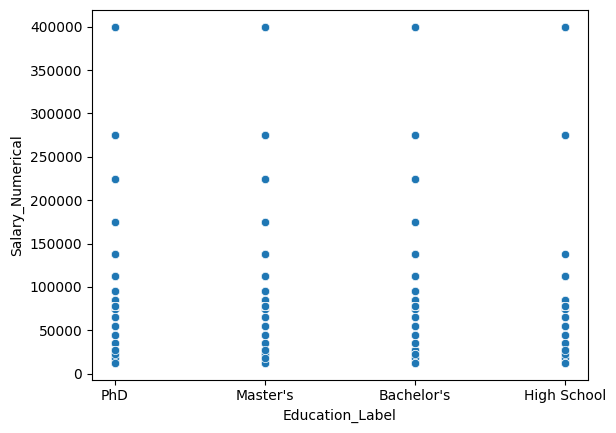

In [ ]:
sns.scatterplot(x='Education_Label', y='Salary_Numerical', data=df)
plt.show()

